In [1]:
include("optim_lib.jl")
include("lib_func.jl")

# Constants and Parameters
d1, d2, ds = 30, 34, 1  # Degree range and step
const n, a, b = 2, 1, 3 
const C = a / b  # Scaling constant, C is appears in `main_computation`, maybe it should be a parameter.
const delta, alph = .9 , 2 / 10  # Sampling parameters
f = tref # Objective function

tref (generic function with 1 method)

In [2]:
coeffs_poly_approx = main_gen(f, n, d1, d2, ds, delta, alph, C, 0.1)

dimension Vector space: 10
sample size: 196
dimension Vector space: 15
sample size: 361
dimension Vector space: 21
sample size: 625
dimension Vector space: 28
sample size: 961


4-element Vector{Vector{Float64}}:
 [1.3574770265687761, 0.0723357236811612, -0.048450769435772645, -0.7068227649711525, 0.643752366357123, 9.405039543501241e-17, 0.39361901092848894, 0.11491905974849856, 0.3936190109284887, -0.11576383158617357]
 [1.3182553905425296, 0.03484937234398059, 0.014704455724405575, -0.5661033607701264, -0.07819399084775311, 0.5187718033522505, -2.3719516862925064e-17, 0.3936190109284892, 2.6136039169494975e-16, 0.08985043524807491, 0.39361901092848944, -5.562149890671133e-17, 0.20602822584607966, 4.432824863288252e-17, 0.006897087622533853]
 [1.3285246986084558, 0.02407957950416873, -0.015440369063101067, -0.5575386128081634, -0.01747514846823765, -0.5143547518849798, 0.5124844093346993, 1.1477618810345045e-16, 0.3936190109284895, 3.879703441696937e-16  …  0.08984606344825426, 0.3936190109284894, -1.466092325843366e-16, -0.691998375045716, 0.2166456499806226, 3.089277173604447e-17, -0.6919983750457159, 0.006933999337684683, -0.1483295927438834, 0.6512311973

In [4]:
using DynamicPolynomials, MultivariatePolynomials, HomotopyContinuation, ProgressLogging

include("hom_solve.jl") # Include the homotopy solver and main function
vars = @polyvar(x[1:n]) # Define polynomial ring 

# lambda = support_gen(n, d1)[1]
# R = generateApproximant(lambda, coeffs_poly_approx[1], :BigFloat)
# println(R)
h_x, h_y, col = main_2d(n, d1, d2, ds, coeffs_poly_approx)

Degree: 3
Number of solutions: 2
Degree: 4
Number of solutions: 4
Degree: 5
Number of solutions: 16
Degree: 6
Number of solutions: 16


([0.430243958090784, -0.4549248212317562, -0.3616145496351937, 0.47557239424844067, 0.5210404851575902, -0.4291017684178984, -0.7879734710546581, 0.738316897811249, 0.2781850440724826, -0.287282971684978  …  0.665401374222579, -0.6697266022330123, 0.797661351476465, -0.7848629956305702, -0.3989888041938196, -0.1032490755031468, 0.8444079557059639, -0.8506014208759408, 0.39877032232655674, 0.732252384738108], [-0.4288614705917791, 0.6532131683174577, 0.4564978900682982, -0.6393022842697885, 0.18267853141022664, -0.3018650937708222, -0.7498204278567903, -0.2604542277086432, 0.2698397382381667, -0.25930949274161896  …  -0.8260545469040513, 0.8011661669444177, 0.7056625422126772, -0.7659168234996494, 0.14230636036554187, -0.7248259316375243, 0.4259486891727854, -0.43344355437774656, -0.18559158063000583, -0.2804527951207065], [1, 1, 2, 2, 2, 2, 3, 3, 3, 3  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

┌ Warning: attempting to remove probably stale pidfile
│   path = /home/georgy/.jlassetregistry.lock
└ @ Pidfile /home/georgy/.julia/packages/Pidfile/DDu3M/src/Pidfile.jl:260


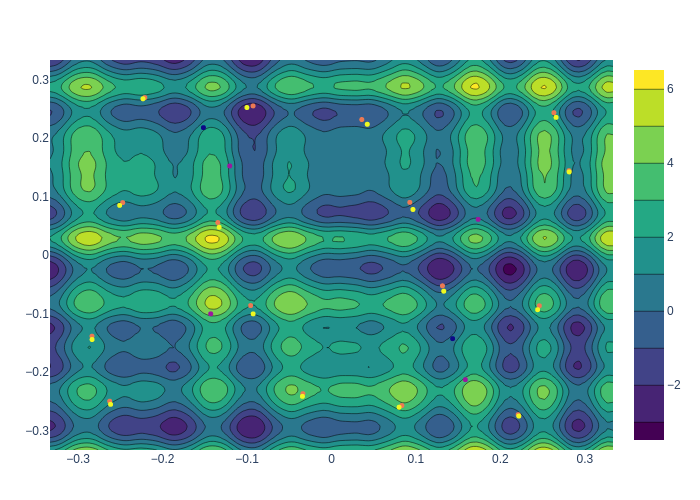

In [5]:
using PlotlyJS

# Define the function and domain

# Generate the grid and evaluate the function
N = 100  # resolution of the grid
x = range(-C, C, length=N)
y = range(-C, C, length=N)
z = [tref([xi, yi]) for xi in x, yi in y]

sc_plt = scatter(x=C* h_x, y=C* h_y, mode="markers", marker_color=col, marker_size=5);


# Create the plot with more contours and smooth transitions
cp = contour(x=x, y=y, z=z, fill=true, levels=50, colorscale="Viridis")

display(plot([cp, sc_plt]))